# CS 195: Natural Language Processing
## Context-Free Grammars

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ericmanley/f23-CS195NLP/blob/main/F4_3_ContextFreeGrammars.ipynb)


## References

SLP: Context-Free Grammars and Constituency Parsing, Chapter 17 of *Speech and Language Processing* by Daniel Jurafsky & James H. Martin: https://web.stanford.edu/~jurafsky/slp3/17.pdf

NLTK Book Chapter 8: Analyzing Sentence Structure: https://www.nltk.org/book/ch08.html

In [1]:
import sys
!{sys.executable} -m pip install nltk svgling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.2 MB/s eta 0:00:00


In [2]:
#you shouldn't need to do this in Colab, but I had to do it on my own machine
#in order to connect to the nltk service
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


## Syntax

**Syntax** of natural language: the study of language *structure*, or how words combine to form phrases and sentences

Like programming language syntax - what are the rules for making a valid program?

In linguistics, syntax can be described using a **grammar**

A **context-free grammar** is one kind of *formal* grammar that can describe most structural aspects of natural languages



## Programming Language Context-Free Grammar

Here's an example of some **grammar rules** or **productions** that you might find in a C-like programming language (a real programming language will have *a lot more* productions than this)

<table>
    <tr>
        <td style="text-align: right;">
            <i>IfStatement</i>
        </td>
        <td style="text-align: center;">
            &rarr;
        </td>
        <td style="text-align: left;">
            <code>if</code> <code>(</code> <i>Expression</i> <code>)</code> <i>Statement</i> <code>;</code>
        </td>
    </tr>
    <tr>
        <td style="text-align: right;">
            <i>Statement</i>
        </td>
        <td style="text-align: center;">
            &rarr;
        </td>
        <td style="text-align: left;">
            <i>IfStatement</i>
        </td>
    </tr>
  <tr>
    <td style="text-align: right;"><em>Statement</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>IfElseStatement</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Statement</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>WhileStatement</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Statement</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>AssignmentStatement</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Expression</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>Expression</em> <code>+</code> <em>Expression</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Expression</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>Expression</em> <code>-</code> <em>Expression</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Expression</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>Expression</em> <code>&lt;</code> <em>Expression</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Expression</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>Expression</em> <code>==</code> <em>Expression</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Expression</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>Number</em></td>
  </tr>
    
</table>



### Notes

The $\rightarrow$ symbol means *can have the form*

tokens like `if`, `(`, `;`, and `+` are **terminal symbols** - they represent actual text

symbols like *IfStatement*, *Expression*, and *Statement* are **non-terminal** symbols - they need to be described with other productions

## Abbreviated notation

You can use the `|` symbol to mean "or" when giving a list of possible forms.

<table>
    <tr>
        <td style="text-align: right;">
            <i>IfStatement</i>
        </td>
        <td style="text-align: center;">
            &rarr;
        </td>
        <td style="text-align: left;">
            <code>if</code> <code>(</code> <i>Expression</i> <code>)</code> <i>Statement</i> <code>;</code>
        </td>
    </tr>
  <tr>
    <td style="text-align: right;"><em>Statement</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>IfStatement</em> | <em>IfElseStatement</em> | <em>WhileStatement</em> | <em>AssignmentStatement</em></td>
  </tr>
    <td style="text-align: right;"><em>Expression</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>Expression</em> <code>+</code> <em>Expression</em> | <em>Expression</em> <code>-</code> <em>Expression</em> </td>
  </tr>
  <tr>
    <td style="text-align: right;"></td>
    <td style="text-align: center;"></td>
    <td style="text-align: left;">| <em>Expression</em> <code>&lt;</code> <em>Expression</em> | <em>Expression</em> <code>==</code> <em>Expression</em> </td>
  </tr>
  <tr>
    <td style="text-align: right;"><em></em></td>
    <td style="text-align: center;"></td>
    <td style="text-align: left;">| <em>Number</em></td>
  </tr>
    
</table>

## A small English context-free grammar

Here's a variation of a small subset of English from SLP 17.2


<table>
  <tr>
    <td style="text-align: right;"><em>Sentence</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>NounPhrase</em> <em>VerbPhrase</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>NounPhrase</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>Pronoun</em> | <em>Determiner</em> <em>Noun</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>VerbPhrase</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>Verb</em> <em>NounPhrase</em> | <em>Verb</em> <em>NounPhrase</em> <em>PropositionalPhrase</em> | <em>Verb</em> <em>PrepositionalPhrase</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>PrepositionalPhrase</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>Preposition</em> <em>NounPhrase</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Determiner</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><code>a</code> | <code>an</code> | <code>the</code> | <code>this</code> | <code>that</code> | <code>my</code> | ...</td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Pronoun</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><code>me</code> | <code>I</code> | <code>you</code> | <code>it</code> | ...</td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Noun</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><code>flights</code> | <code>flight</code> | <code>breeze</code> | <code>trip</code> | <code>morning</code> | <code>elephant</code> | <code>pajamas</code> | ...</td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Verb</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><code>is</code> | <code>prefer</code> | <code>like</code> | <code>need</code> | <code>want</code> | <code>fly</code> | <code>do</code> | <code>shot</code> | ...</td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Preposition</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><code>from</code> | <code>to</code> | <code>on</code> | <code>near</code> | <code>in</code> | ...</td>
  </tr>
</table>


## Derivations

A **Derivation** is a sequence of steps in which you replace non-terminals with one of the options on the right side of a production until you end up with only terminals.

For example

*Sentence* $\Rightarrow$ *NounPhrase* *VerbPhrase* $\Rightarrow$ *Pronoun* *VerbPhrase* $\Rightarrow$ *Pronoun* *Verb* *NounPhrase* $\Rightarrow$ `I` *Verb* *NounPhrase* $\Rightarrow$ `I` *Verb* *Determiner* *Noun* $\Rightarrow$ `I` *Verb* *Determiner* `flight`
$\Rightarrow$ `I` *Verb* *Determiner* `flight` $\Rightarrow$ `I` *Verb* `a` `flight` $\Rightarrow$ `I` `need` `a` `flight`

This shows that `I need a flight` can be derived from *Sentence*, so it is a valid sentence in the language.

## Parse Trees

A **parse tree** is a graphical representation of a derivation sequence.

Here's a parse tree for `I need a flight`


<div>
<img src="https://github.com/ericmanley/f23-CS195NLP/blob/main/images/parse_tree.png?raw=1" width = 500/>
</div>

## Group Exercise

Find another sentence that can generated from *Sentence* but whose parse tree looks different.

Draw the parse tree.

              SENTENCE
         |                |
      NounPhrase       VerbPhrase
         |           |          |
      Pronoun      Verb     PrepositionalPhrase
         |           |       |           |
        You        like    Preposition   NounPhrase
                            |            |         |
                           to         Determiner  Noun
                                      |              |
                                     a              trip
    

## CFGs in NLTK

The following examples show how you can define context-free grammars using the nltk library.

Here's what the internal structure looks like:
[Tree('NounPhrase', [Tree('Pronoun', ['I'])]), Tree('VerbPhrase', [Tree('Verb', ['need']), Tree('NounPhrase', [Tree('Determiner', ['a']), Tree('Noun', ['flight'])])])]

Here's what the parse tree looks like graphically:


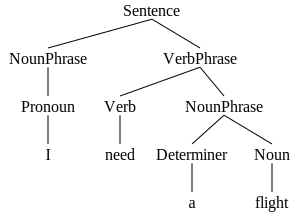

In [4]:
import nltk


productions = [
    nltk.Production(nltk.Nonterminal('Sentence'), [nltk.Nonterminal('NounPhrase'), nltk.Nonterminal('VerbPhrase')]),
    nltk.Production(nltk.Nonterminal('NounPhrase'), [nltk.Nonterminal('Pronoun')]),
    nltk.Production(nltk.Nonterminal('NounPhrase'), [nltk.Nonterminal('Determiner'), nltk.Nonterminal('Noun')]),
    nltk.Production(nltk.Nonterminal('NounPhrase'), [nltk.Nonterminal('Noun')]),
    nltk.Production(nltk.Nonterminal('VerbPhrase'), [nltk.Nonterminal('Verb'), nltk.Nonterminal('NounPhrase')]),
    nltk.Production(nltk.Nonterminal('VerbPhrase'), [nltk.Nonterminal('Verb'), nltk.Nonterminal('NounPhrase'), nltk.Nonterminal('PrepositionalPhrase')]),
    nltk.Production(nltk.Nonterminal('VerbPhrase'), [nltk.Nonterminal('Verb'), nltk.Nonterminal('PrepositionalPhrase')]),
    nltk.Production(nltk.Nonterminal('PrepositionalPhrase'), [nltk.Nonterminal('Preposition'), nltk.Nonterminal('NounPhrase')]),

    # Productions for Determiner
    nltk.Production(nltk.Nonterminal('Determiner'), ['a']),
    nltk.Production(nltk.Nonterminal('Determiner'), ['an']),
    nltk.Production(nltk.Nonterminal('Determiner'), ['the']),
    nltk.Production(nltk.Nonterminal('Determiner'), ['this']),
    nltk.Production(nltk.Nonterminal('Determiner'), ['that']),
    nltk.Production(nltk.Nonterminal('Determiner'), ['my']),
    # Add more Determiner productions as needed

    # Productions for Pronoun
    nltk.Production(nltk.Nonterminal('Pronoun'), ['me']),
    nltk.Production(nltk.Nonterminal('Pronoun'), ['I']),
    nltk.Production(nltk.Nonterminal('Pronoun'), ['you']),
    nltk.Production(nltk.Nonterminal('Pronoun'), ['it']),
    # Add more Pronoun productions as needed

    # Productions for Noun
    nltk.Production(nltk.Nonterminal('Noun'), ['flights']),
    nltk.Production(nltk.Nonterminal('Noun'), ['flight']),
    nltk.Production(nltk.Nonterminal('Noun'), ['breeze']),
    nltk.Production(nltk.Nonterminal('Noun'), ['trip']),
    nltk.Production(nltk.Nonterminal('Noun'), ['morning']),
    nltk.Production(nltk.Nonterminal('Noun'), ['elephant']),
    nltk.Production(nltk.Nonterminal('Noun'), ['pajamas']),
    # Add more Noun productions as needed

    # Productions for Verb
    nltk.Production(nltk.Nonterminal('Verb'), ['is']),
    nltk.Production(nltk.Nonterminal('Verb'), ['prefer']),
    nltk.Production(nltk.Nonterminal('Verb'), ['like']),
    nltk.Production(nltk.Nonterminal('Verb'), ['need']),
    nltk.Production(nltk.Nonterminal('Verb'), ['want']),
    nltk.Production(nltk.Nonterminal('Verb'), ['fly']),
    nltk.Production(nltk.Nonterminal('Verb'), ['do']),
    nltk.Production(nltk.Nonterminal('Verb'), ['shot']),
    # Add more Verb productions as needed

    # Productions for Preposition
    nltk.Production(nltk.Nonterminal('Preposition'), ['from']),
    nltk.Production(nltk.Nonterminal('Preposition'), ['to']),
    nltk.Production(nltk.Nonterminal('Preposition'), ['on']),
    nltk.Production(nltk.Nonterminal('Preposition'), ['near']),
    nltk.Production(nltk.Nonterminal('Preposition'), ['in']),
    # Add more Preposition productions as needed
]

#Sentence is top-level symbol
custom_grammar = nltk.CFG(nltk.Nonterminal('Sentence'), productions)

#we'll talk about parsers later
parser = nltk.ChartParser(custom_grammar)

#an example tokenized sentence
sentence = "I need a flight".split()

#there could be many trees
for tree in parser.parse(sentence):
    # Visualize the parse tree
    print("Here's what the internal structure looks like:")
    print(list(tree))
    #nltk.draw.tree.draw_trees(tree) #uncomment to get an image
    print("\nHere's what the parse tree looks like graphically:")
    display(tree)

## Group Exercise

Run this code and try parsing the sentences you came up with on the previous exercise. Compare your parse trees with those produced with the parser.

Here's what the internal structure looks like:
[Tree('NounPhrase', [Tree('Pronoun', ['you'])]), Tree('VerbPhrase', [Tree('Verb', ['like']), Tree('PrepositionalPhrase', [Tree('Preposition', ['to']), Tree('NounPhrase', [Tree('Determiner', ['a']), Tree('Noun', ['trip'])])])])]

Here's what the parse tree looks like graphically:


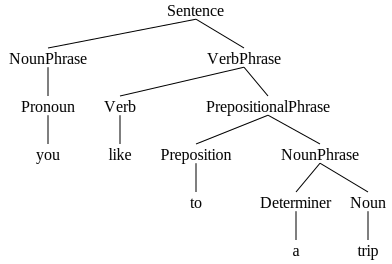

In [6]:
sentence = "you like to a trip".split()
for tree in parser.parse(sentence):
    # Visualize the parse tree
    print("Here's what the internal structure looks like:")
    print(list(tree))
    #nltk.draw.tree.draw_trees(tree) #uncomment to get an image
    print("\nHere's what the parse tree looks like graphically:")
    display(tree)

## Recursive Productions

Grammars can contain recursion. For example, let's change our definition of a *NounPhrase*

<table>
  <tr>
    <td style="text-align: right;"><em>NounPhrase</em></td>
    <td style="text-align: center;">&rarr;</td>
    <td style="text-align: left;"><em>Pronoun</em> | <em>Determiner</em> <em>Nominal</em> | <em>Nominal</em></td>
  </tr>
  <tr>
    <td style="text-align: right;"><em>Nominal</em></td>
    <td style="text-align: center;">&rarr;</td>
      <td style="text-align: left;"><em>Nominal</em> <em>Noun</em> | <em>Nominal</em> | <em>Noun</em> </td>
  </tr>
</table>

This allows for trees like


<div>
<img src="https://github.com/ericmanley/f23-CS195NLP/blob/main/images/recursive_parse_tree1.png?raw=1" width=400 /><img src="https://github.com/ericmanley/f23-CS195NLP/blob/main/images/recursive_parse_tree2.png?raw=1" width=400/>
</div>

## Group Exercise

Add productions to the grammar that allows for multiple prepositional phrases like `I fly in the morning on a flight`

<div>
<img src="https://github.com/ericmanley/f23-CS195NLP/blob/main/images/preposition_parse_tree1.png?raw=1" width=500/>
</div>

## Group Exercise

Include the new definition of *NounPhrase* and *Nominal* as well as your recursive prepositional phrases in the nltk grammar. Test it out.

Here's what the internal structure looks like:
[Tree('NounPhrase', [Tree('Pronoun', ['I'])]), Tree('VerbPhrase', [Tree('Verb', ['fly']), Tree('PrepositionalPhrase', [Tree('Preposition', ['in']), Tree('NounPhrase', [Tree('Determiner', ['the']), Tree('Nominal', [Tree('Noun', ['morning'])])])])])]

Here's what the parse tree looks like graphically:


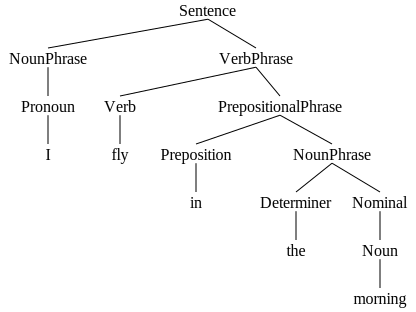

Here's what the internal structure looks like:
[Tree('NounPhrase', [Tree('Pronoun', ['I'])]), Tree('VerbPhrase', [Tree('Verb', ['fly']), Tree('PrepositionalPhrase', [Tree('Preposition', ['in']), Tree('NounPhrase', [Tree('Determiner', ['the']), Tree('Nominal', [Tree('Nominal', [Tree('Noun', ['morning'])])])])])])]

Here's what the parse tree looks like graphically:


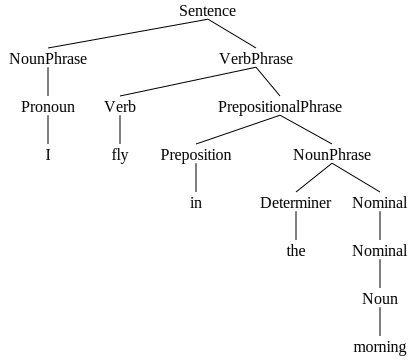

In [9]:
import nltk


productions = [
    nltk.Production(nltk.Nonterminal('Sentence'), [nltk.Nonterminal('NounPhrase'), nltk.Nonterminal('VerbPhrase')]),
    nltk.Production(nltk.Nonterminal('NounPhrase'), [nltk.Nonterminal('Pronoun')]),
    nltk.Production(nltk.Nonterminal('NounPhrase'), [nltk.Nonterminal('Determiner'), nltk.Nonterminal('Nominal')]),
    nltk.Production(nltk.Nonterminal('NounPhrase'), [nltk.Nonterminal('Nominal')]),
    nltk.Production(nltk.Nonterminal('Nominal'), [nltk.Nonterminal('Nominal'), nltk.Nonterminal('Noun')]),
    nltk.Production(nltk.Nonterminal('Nominal'), [nltk.Nonterminal('Nominal')]),
    nltk.Production(nltk.Nonterminal('Nominal'), [nltk.Nonterminal('Noun')]),
    nltk.Production(nltk.Nonterminal('VerbPhrase'), [nltk.Nonterminal('Verb'), nltk.Nonterminal('NounPhrase')]),
    nltk.Production(nltk.Nonterminal('VerbPhrase'), [nltk.Nonterminal('Verb'), nltk.Nonterminal('NounPhrase'), nltk.Nonterminal('PrepositionalPhrase')]),
    nltk.Production(nltk.Nonterminal('VerbPhrase'), [nltk.Nonterminal('Verb'), nltk.Nonterminal('PrepositionalPhrase')]),
    nltk.Production(nltk.Nonterminal('PrepositionalPhrase'), [nltk.Nonterminal('Preposition'), nltk.Nonterminal('NounPhrase')]),
    nltk.Production(nltk.Nonterminal('PrepositionalPhrase'), [nltk.Nonterminal('Preposition'), nltk.Nonterminal('NounPhrase'), nltk.Nonterminal('PrepositionalPhrase')]),

    # Productions for Determiner
    nltk.Production(nltk.Nonterminal('Determiner'), ['a']),
    nltk.Production(nltk.Nonterminal('Determiner'), ['an']),
    nltk.Production(nltk.Nonterminal('Determiner'), ['the']),
    nltk.Production(nltk.Nonterminal('Determiner'), ['this']),
    nltk.Production(nltk.Nonterminal('Determiner'), ['that']),
    nltk.Production(nltk.Nonterminal('Determiner'), ['my']),
    # Add more Determiner productions as needed

    # Productions for Pronoun
    nltk.Production(nltk.Nonterminal('Pronoun'), ['me']),
    nltk.Production(nltk.Nonterminal('Pronoun'), ['I']),
    nltk.Production(nltk.Nonterminal('Pronoun'), ['you']),
    nltk.Production(nltk.Nonterminal('Pronoun'), ['it']),
    # Add more Pronoun productions as needed

    # Productions for Noun
    nltk.Production(nltk.Nonterminal('Noun'), ['flights']),
    nltk.Production(nltk.Nonterminal('Noun'), ['flight']),
    nltk.Production(nltk.Nonterminal('Noun'), ['breeze']),
    nltk.Production(nltk.Nonterminal('Noun'), ['trip']),
    nltk.Production(nltk.Nonterminal('Noun'), ['morning']),
    nltk.Production(nltk.Nonterminal('Noun'), ['elephant']),
    nltk.Production(nltk.Nonterminal('Noun'), ['pajamas']),
    # Add more Noun productions as needed

    # Productions for Verb
    nltk.Production(nltk.Nonterminal('Verb'), ['is']),
    nltk.Production(nltk.Nonterminal('Verb'), ['prefer']),
    nltk.Production(nltk.Nonterminal('Verb'), ['like']),
    nltk.Production(nltk.Nonterminal('Verb'), ['need']),
    nltk.Production(nltk.Nonterminal('Verb'), ['want']),
    nltk.Production(nltk.Nonterminal('Verb'), ['fly']),
    nltk.Production(nltk.Nonterminal('Verb'), ['do']),
    nltk.Production(nltk.Nonterminal('Verb'), ['shot']),
    # Add more Verb productions as needed

    # Productions for Preposition
    nltk.Production(nltk.Nonterminal('Preposition'), ['from']),
    nltk.Production(nltk.Nonterminal('Preposition'), ['to']),
    nltk.Production(nltk.Nonterminal('Preposition'), ['on']),
    nltk.Production(nltk.Nonterminal('Preposition'), ['near']),
    nltk.Production(nltk.Nonterminal('Preposition'), ['in']),
    # Add more Preposition productions as needed
]

#Sentence is top-level symbol
custom_grammar = nltk.CFG(nltk.Nonterminal('Sentence'), productions)

#we'll talk about parsers later
parser = nltk.ChartParser(custom_grammar)

#an example tokenized sentence
sentence = "I fly in the morning".split()

#there could be many trees
for tree in parser.parse(sentence):
    # Visualize the parse tree
    print("Here's what the internal structure looks like:")
    print(list(tree))
    #nltk.draw.tree.draw_trees(tree) #uncomment to get an image
    print("\nHere's what the parse tree looks like graphically:")
    display(tree)

## Ambiguity

An ambiguous grammar is a grammar in which the same sentence can have multiple trees.


<div>
<img src="https://github.com/ericmanley/f23-CS195NLP/blob/main/images/elephant_pajamas_1.png?raw=1" width=500/><img src="https://github.com/ericmanley/f23-CS195NLP/blob/main/images/elephant_pajamas_2.png?raw=1" width=500/>
</div>

### Most natural languages are ambiguous


*One morning I shot an elephant in my pajamas. How he got into my pajamas I don’t know.* - Groucho Marx

With programming languages, designers try to define them so that the grammars are unambiguous

It isn't possible with most natural languages


### Group Exercise

Find another sentence with more than one parse tree for this grammar:




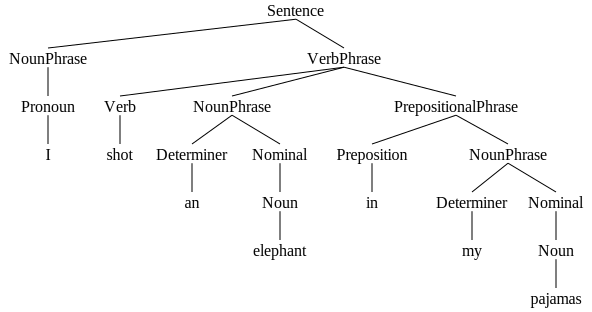

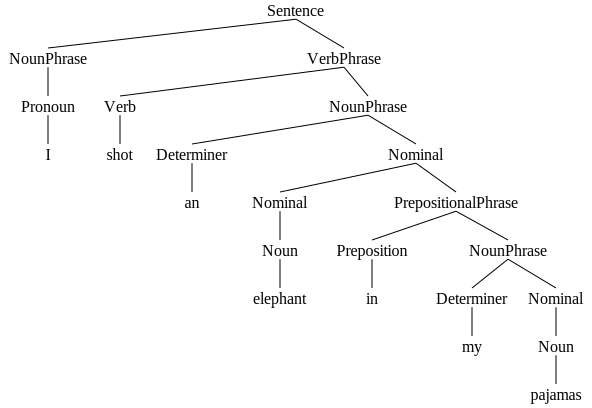

In [10]:
import nltk


productions = [
    nltk.Production(nltk.Nonterminal('Sentence'), [nltk.Nonterminal('NounPhrase'), nltk.Nonterminal('VerbPhrase')]),
    nltk.Production(nltk.Nonterminal('NounPhrase'), [nltk.Nonterminal('Pronoun')]),
    nltk.Production(nltk.Nonterminal('NounPhrase'), [nltk.Nonterminal('Determiner'), nltk.Nonterminal('Nominal')]),
    nltk.Production(nltk.Nonterminal('NounPhrase'), [nltk.Nonterminal('Nominal')]),
    nltk.Production(nltk.Nonterminal('Nominal'), [nltk.Nonterminal('Nominal'), nltk.Nonterminal('Noun')]),
    nltk.Production(nltk.Nonterminal('Nominal'), [nltk.Nonterminal('Nominal'), nltk.Nonterminal('PrepositionalPhrase')]),
    nltk.Production(nltk.Nonterminal('Nominal'), [nltk.Nonterminal('Noun')]),
    nltk.Production(nltk.Nonterminal('VerbPhrase'), [nltk.Nonterminal('Verb'), nltk.Nonterminal('NounPhrase')]),
    nltk.Production(nltk.Nonterminal('VerbPhrase'), [nltk.Nonterminal('Verb'), nltk.Nonterminal('NounPhrase'), nltk.Nonterminal('PrepositionalPhrase')]),
    nltk.Production(nltk.Nonterminal('VerbPhrase'), [nltk.Nonterminal('Verb'), nltk.Nonterminal('PrepositionalPhrase')]),
    nltk.Production(nltk.Nonterminal('PrepositionalPhrase'), [nltk.Nonterminal('Preposition'), nltk.Nonterminal('NounPhrase')]),

    # Productions for Determiner
    nltk.Production(nltk.Nonterminal('Determiner'), ['a']),
    nltk.Production(nltk.Nonterminal('Determiner'), ['an']),
    nltk.Production(nltk.Nonterminal('Determiner'), ['the']),
    nltk.Production(nltk.Nonterminal('Determiner'), ['this']),
    nltk.Production(nltk.Nonterminal('Determiner'), ['that']),
    nltk.Production(nltk.Nonterminal('Determiner'), ['my']),
    # Add more Determiner productions as needed

    # Productions for Pronoun
    nltk.Production(nltk.Nonterminal('Pronoun'), ['me']),
    nltk.Production(nltk.Nonterminal('Pronoun'), ['I']),
    nltk.Production(nltk.Nonterminal('Pronoun'), ['you']),
    nltk.Production(nltk.Nonterminal('Pronoun'), ['it']),
    # Add more Pronoun productions as needed

    # Productions for Noun
    nltk.Production(nltk.Nonterminal('Noun'), ['flights']),
    nltk.Production(nltk.Nonterminal('Noun'), ['flight']),
    nltk.Production(nltk.Nonterminal('Noun'), ['breeze']),
    nltk.Production(nltk.Nonterminal('Noun'), ['trip']),
    nltk.Production(nltk.Nonterminal('Noun'), ['morning']),
    nltk.Production(nltk.Nonterminal('Noun'), ['elephant']),
    nltk.Production(nltk.Nonterminal('Noun'), ['pajamas']),
    # Add more Noun productions as needed

    # Productions for Verb
    nltk.Production(nltk.Nonterminal('Verb'), ['is']),
    nltk.Production(nltk.Nonterminal('Verb'), ['prefer']),
    nltk.Production(nltk.Nonterminal('Verb'), ['like']),
    nltk.Production(nltk.Nonterminal('Verb'), ['need']),
    nltk.Production(nltk.Nonterminal('Verb'), ['want']),
    nltk.Production(nltk.Nonterminal('Verb'), ['fly']),
    nltk.Production(nltk.Nonterminal('Verb'), ['do']),
    nltk.Production(nltk.Nonterminal('Verb'), ['shot']),
    # Add more Verb productions as needed

    # Productions for Preposition
    nltk.Production(nltk.Nonterminal('Preposition'), ['from']),
    nltk.Production(nltk.Nonterminal('Preposition'), ['to']),
    nltk.Production(nltk.Nonterminal('Preposition'), ['on']),
    nltk.Production(nltk.Nonterminal('Preposition'), ['near']),
    nltk.Production(nltk.Nonterminal('Preposition'), ['in']),
    # Add more Preposition productions as needed
]

custom_grammar = nltk.CFG(nltk.Nonterminal('Sentence'), productions)

parser = nltk.ChartParser(custom_grammar)
sentence = "I shot an elephant in my pajamas".split()
for tree in parser.parse(sentence):
    display(tree)


## Group Discussion

What are some strategies you can think of for figuring out which tree is really the correct one?

## Penn Treebank Grammar

Remember our Penn Treebank dataset that was tagged with parts of speech? It also has full parse trees built for the sentences in the dataset.

In [ ]:
from nltk.corpus import treebank
nltk.download('treebank') #do this if needed
print(treebank.parsed_sents())


[Tree('S', [Tree('NP-SBJ', [Tree('NP', [Tree('NNP', ['Pierre']), Tree('NNP', ['Vinken'])]), Tree(',', [',']), Tree('ADJP', [Tree('NP', [Tree('CD', ['61']), Tree('NNS', ['years'])]), Tree('JJ', ['old'])]), Tree(',', [','])]), Tree('VP', [Tree('MD', ['will']), Tree('VP', [Tree('VB', ['join']), Tree('NP', [Tree('DT', ['the']), Tree('NN', ['board'])]), Tree('PP-CLR', [Tree('IN', ['as']), Tree('NP', [Tree('DT', ['a']), Tree('JJ', ['nonexecutive']), Tree('NN', ['director'])])]), Tree('NP-TMP', [Tree('NNP', ['Nov.']), Tree('CD', ['29'])])])]), Tree('.', ['.'])]), Tree('S', [Tree('NP-SBJ', [Tree('NNP', ['Mr.']), Tree('NNP', ['Vinken'])]), Tree('VP', [Tree('VBZ', ['is']), Tree('NP-PRD', [Tree('NP', [Tree('NN', ['chairman'])]), Tree('PP', [Tree('IN', ['of']), Tree('NP', [Tree('NP', [Tree('NNP', ['Elsevier']), Tree('NNP', ['N.V.'])]), Tree(',', [',']), Tree('NP', [Tree('DT', ['the']), Tree('NNP', ['Dutch']), Tree('VBG', ['publishing']), Tree('NN', ['group'])])])])])]), Tree('.', ['.'])]), ...]


[nltk_data] Downloading package treebank to
[nltk_data]     /Users/000794593/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


## Inferring the Penn Treebank Grammar

The following code will construct the grammar from these trees.

One problem - this grammar has a limited vocabulary.
* Note: I had to sub a word for `pajamas`

Another problem - this may take a while to run

Maybe you can figure out a way to deal with this and do something interesting with it.

In [ ]:
import nltk
from nltk.corpus import treebank

# Download the Penn Treebank corpus
#nltk.download('treebank')

# Extract and prepare treebank sentences
treebank_sents = treebank.parsed_sents()

# go through each parsed sentence and put its production
# into a big list of productions
productions = []
for sent in treebank.parsed_sents():
    for curr_production in sent.productions():
        productions.append( curr_production )

treebank_grammar = nltk.CFG(nltk.Nonterminal('S'), productions)

parser = nltk.ChartParser(treebank_grammar)
sentence = "I shot an elephant in my car".split()
for tree in parser.parse(sentence):
    display(tree)

## Applied Exploration

Complete the exercises/dicussion form this workshop. Inlude your notes and written answers to questions.

Also, go to https://web.stanford.edu/~jurafsky/slp3/17.pdf and find the $\mathscr{L}_1$ grammar. There are still a few productions we are missing - add them in here and provide some test strings which use those productions. Feel free to add additional words for the different parts of speech.